# Libraries

In [32]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import warnings

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import string
import nltk
nltk.download('stopwords')
import shutil
from matplotlib import pyplot


import seaborn as sns
import matplotlib.pylab as plt

from datetime import datetime, timedelta
from tqdm import tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/halledavis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#conda install -c conda-forge seaborn=0.12.2

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::holoviews==1.14.8=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.2=pyhd3eb1b0_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/noarch::google-auth==2.6.0=pyhd3eb1b0_0
  - defaults/osx-64::astroid==2.6.6=py39hecd8cb5_0
  - defaults/osx-64::numba==0.54.1=py39hae1ba45_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/osx-64::gevent==21.8.0=py39h9ed2024_1
  - defaults/osx-64::_anaconda_depends==2022.05=py39_0
  - defaults/osx-64::aiohttp==3.8.1=py39hca72f7f_1
  - defaults/noarch::typing-extensions==3.10.0.2=hd3eb1b0_0
  - defaults/osx-64::zope.event==4.5.0=py39hecd8cb5_0
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_

pillow-7.2.0         | 634 KB    | ##################################### | 100% 
matplotlib-base-3.4. | 7.3 MB    | ##################################### | 100% 
scikit-learn-1.0.2   | 7.3 MB    | ##################################### | 100% 
openssl-1.1.1u       | 1.7 MB    | ##################################### | 100% 
typing_extensions-4. | 35 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: failed

RemoveError: 'setuptools' is a dependency of conda and cannot be removed from
conda's operating environment.


Note: you may need to restart the kernel to use updated packages.


# Data Load

In [3]:
#os.chdir('C:\\Users\\halle.davis\\Downloads\\') ## Halle's work folder path
os.chdir('/Users/halledavis/Downloads/') ## Halle's personal folder path
#os.chdir('/users/clairephibbs/Desktop/') ## Claire's folder path
#os.chdir('/Users/summerpurschke/Desktop/ADS/Capstone') ## Summer's folder path

### Dataset Description - Accidents

TABLE_NAME|COLUMN_NAME|DATA_TYPE|DATA_LENGTH|FIELD_DESCRIPTION

1. MINE_ID|VARCHAR2|7|Identification number assigned to the mine by MSHA.  It is the mine identification number of the mine where the accident/injury/illness occurred.  Use mine_id to join to the Mines and Inspections tables.  Use mine_id and cal_yr to join to mine_id and cal_yr in Qrtly and Annual Employ Emprod tables.
2. CONTROLLER_ID|VARCHAR2|7|Identification number assigned by MSHA Assessments for a Legal Entity acting as a controller of an operator at the time of the accident.   May contain null values.   
3. CONTROLLER_NAME|VARCHAR2|100|Name of the controller active at the time of the accident.  May contain null values. 
4. OPERATOR_ID|VARCHAR2|7|Identification number assigned by MSHA for a Legal Entity acting as an operator at a mine at the time of the accident.  May contain null values.
5. OPERATOR_NAME|VARCHAR2|60|Name of the operator active at the time of the accident.  May contain null values.
6. CONTRACTOR_ID|VARCHAR2|10|Identification number assigned by MSHA for companies working as contractors at a mine.  It is the contractor id of the contractor or contractor employee involved in the accident/injury.  May contain null values if the accident did not involve a contractor.
7. DOCUMENT_NO|VARCHAR2|12|Document number assigned to the accident/injury form.  The first number designates the type of document:  (1) employment, (2) injury and (3) closing document.  The next seven are the Julian date (YYYYDDD).  The last four characters are a sequential number.
8. SUBUNIT_CD|VARCHAR2|2|Code that identifies the location within a mine where the accident/injury/illness occurred.
9. SUBUNIT|VARCHAR2|32|Description of the subunit code referring to the location within a mine where the accident/injury/illness occurred: (01) Underground; (02) Surface at underground; (03) Strip, quarry, open pit; (04) Auger; (05) Culm bank/refuse pile; (06) Dredge; (12) Other mining; (17) Independent shops or yards; (30) Mill operation/preparation plant; (99) Office workers at mine site. 
10. ACCIDENT_DT|DATE|10|Date the accident/injury/illness occurred (mm/dd/yyyy).
11. CAL_YR|NUMBER|4|Calendar Year in which the accident/injury/illness occurred.  It is based on the accident date.
12. CAL_QTR|NUMBER|1|Calendar Quarter in which the accident/injury/illness occurred.  It is based on the accident date.
13. FISCAL_YR|NUMBER|4|Fiscal Year in which the accident/injury/illness occurred.  MSHA's fiscal year begins October 1 and ends September 30.  It is based on the accident date.
14. FISCAL_QTR|NUMBER|1|Fiscal Quarter in which the accident/injury/illness occurred.  It is based on the accident date.
15. ACCIDENT_TIME|NUMBER|4|Time the accident/injury/illness occurred (24-hour clock).
16. DEGREE_INJURY_CD|VARCHAR2|2|Code identifying the degree of injury/illness to the individual.
17. DEGREE_INJURY|VARCHAR2|30|Description of the degree of injury/illness to the individual: (00) Accident only; (01) Fatality; (02) Permanent total or permanent partial disability; (03) Days away from work only; (04) Days away from work and restricted activity; (05) Days restricted activity only; (06) No days away from work, no restrictions; (07) Occupational illness not degree 1-6; (08) Injuries due to natural causes; (09) Injuries involving non-employees; (10) All other cases (incl. 1st aid); (?) No value found.
18. FIPS_STATE_CD|VARCHAR2|2|Federal Information Processing Standard (FIPS) state code.  It refers to the state in which accident/injury/illness occurred.
19. UG_LOCATION_CD|VARCHAR2|2|Code identifying the underground location where the accident/injury/illness occurred.
20. UG_LOCATION|VARCHAR2|28|Description of the underground location code where the accident/injury/illness occurred: (01) Vertical shaft; (02) Slope/inclined shaft; (03) Face; (04) Intersection; (05) Underground shop/office; (06) Last open crosscut; (07) Inby permanent support; (08) Haulageway; (09) Other entry (not haulageway); (98) Other; (99) Not Marked; (?) No value found.
21. UG_MINING_METHOD_CD|VARCHAR2|2|Description of the underground mining method code where the accident/injury/illness occurred.
22. UG_MINING_METHOD|VARCHAR2|20|Description of the underground mining method code where the accident/injury/illness occurred: (01) Longwall; (02) Shortwall; (03) Conventional Stoping; (05) Continuous Miner; (06) Hand; (07) Caving; (08) Other; (?) No Value Found.
23. MINING_EQUIP_CD|VARCHAR2|6|Code to designate the type of equipment involved in the incident.  May be '?' if invalid code.
24. MINING_EQUIP|VARCHAR2|56|Description for the type of mining equipment involved in the accident.  May be 'No Value Found' if invalid mining equipment code.
25. EQUIP_MFR_CD|VARCHAR2|4|Codes that identify the manufacturer of equipment involved in the incident.  May be '?' if invalid code.
26. EQUIP_MFR_NAME|VARCHAR2|50|Mining machine manufacturer of a machine involved in an accident.  May be 'No Value Found' if invalid equipment manufacture code.
27. EQUIP_MODEL_NO|VARCHAR2|25|Model number that identifies the equipment involved in the incident.
28. SHIFT_BEGIN_TIME|NUMBER|4|Time the shift started (24-hour clock) during which the incident occurred.
29. CLASSIFICATION_CD|VARCHAR2|2|Accident or injury classification code.  The accident classification identifies the circumstances which contributed most directly to the resulting accident.
30. CLASSIFICATION|VARCHAR2|37|Description of the accident classification code that identifies the circumstances which contributed most directly to the resulting accident.
31. ACCIDENT_TYPE_CD|VARCHAR2|2|The accident type code identifies the event which directly resulted in the reported injury/accident.
32. ACCIDENT_TYPE|VARCHAR2|30|Description of the accident type code.
33. NO_INJURIES|NUMBER|4|Number of reportable injuries or illnesses resulting from the accident.  Zero is a valid number if no employees were injured in the accident or if the injury was not reportable.
34. TOT_EXPER|NUMBER|4,2|Total mining experience of the person affected calculated in decimal years.  The calculation uses both the years and months experience.  May contain null values. 
35. MINE_EXPER|NUMBER|4,2|Total experience at a specific mine of the person affected calculated in decimal years.  The calculation uses both the years and months experience at the mine.  May contain null values.
36. JOB_EXPER|NUMBER|4,2|Experience in the job title of the person affected calculated in decimal year.  The calculation uses both the years and months experience.  May contain null values.
37. OCCUPATION_CD|VARCHAR2|3|Three-digit occupation code of the accident victim's regular job title.
38. OCCUPATION|VARCHAR2|40|Description of the occupation code.
39. ACTIVITY_CD|VARCHAR2|3|Code for the specific activity the accident victim was performing at the time of the incident.  May be '?' if invalid code.
40. ACTIVITY|VARCHAR2|33|Description of the activity code.  May be 'No Value Found' if activity code is invalid.
41. INJURY_SOURCE_CD|VARCHAR2|3|Code identifying the source of the injury or illness.  The source of injury identifies the object, substances, exposure or bodily motion which directly produced or inflicted the injury.  May be '?' if invalid code.
42. INJURY_SOURCE|VARCHAR2|25|Description of the injury source code.  May have a description of 'No Value Found' if invalid injury source code.
43. NATURE_INJURY_CD|VARCHAR2|3|The nature of injury identifies the injury in terms of its principle physical characteristics.  May be '?' if invalid code.
44. NATURE_INJURY|VARCHAR2|25|Description of the nature of the victim's injury.  May have a description of  'No Value Found' if invalid nature of injury code.
45. INJ_BODY_PART_CD|VARCHAR2|3|Code identifying the part of the body affected by an injury.  May be '?' if invalid code.
46. INJ_BODY_PART|VARCHAR2|39|Description of the part of the body affected by an injury.  May have a description of 'No Value Found' if invalid injured body part code.
47. SCHEDULE_CHARGE|NUMBER|4|Charge in days lost for any permanent injury/illness.  Example:  6000 days for a death, 2400 days for the loss of a foot at the ankle.  May contain data (null values) if situation does not apply.
48. DAYS_RESTRICT|NUMBER|4|Number of days of restricted work activity due to the injury/illness.  May contain null values if situation does not apply.
49. DAYS_LOST|NUMBER|3|Actual days lost from work due to the injury/illness.  May not contain null values if situation does not apply.
50. TRANS_TERM|VARCHAR2|1|Indicates if the injured/ill employee was permanently transferred or terminated (Y or N).  May contain null values if situation does not apply.
51. RETURN_TO_WORK_DT|DATE|10|Date the injured/ill employee returned to work (mm/dd/yyyy).  May contain null values if situation does not apply.
52. IMMED_NOTIFY_CD|VARCHAR2|2|Code describing if the accident is one of the 12 types immediately reportable to MSHA.
53. IMMED_NOTIFY|VARCHAR2|20|Description of the Immediate Notification code:  (01) Death; (02) Serious injury; (03) Entrapment; (04) Inundation; (05) Gas of dust ignition; (06) Mine fire; (07) Explosives; (08) Roof fall; (09) Outburst; (10) Impounding dam; (11) Hoisting; (12) Offsite; (13) Not marked; (?) No value found. 
54. INVEST_BEGIN_DT|DATE|10|Date the MSHA accident investigation started (mm/dd/yyyy).
55. NARRATIVE|VARCHAR2|384|Narrative description of the accident/injury/illness.
56. CLOSED_DOC_NO|VARCHAR2|12|Document number assigned to the Returned to Duty form. The first character is designated as a '3' for the closing document.  The next seven are the Julian date (YYYYDDD).  The last four characters are a sequential number.  May contain null values.
57. COAL_METAL_IND|VARCHAR2|1|Identifies if the accident occurred at a Coal or Metal/Non-Metal mine.

In [76]:
inspections = pd.read_csv('Inspections.txt', sep= '|', encoding = 'latin-1')
mines = pd.read_csv('Mines.txt', sep= '|', encoding = 'latin-1')
accidents = pd.read_csv('Accidents.txt', sep= '|', encoding = 'latin-1')
violations = pd.read_csv('Violations.txt', sep= '|', encoding = 'latin-1')

# EDA (Exploratory Data Analysis)

Find columns that are shared between the datasets 

In [107]:
# Get the column names of each dataframe
accidents_columns = set(accidents.columns)
violations_columns = set(violations.columns)
inspections_columns = set(inspections.columns)
mines_columns = set(mines.columns)

# Find the shared columns
shared_columns = set(accidents.columns) & set(violations.columns) & set(inspections.columns) & mines_columns

# Print the shared columns
print("Columns shared among all dataframes:")
for column in shared_columns:
    print(column)

# Find the columns shared between any two dataframes
shared_accidents_violations = accidents_columns & violations_columns
shared_accidents_inspections = accidents_columns & inspections_columns
shared_accidents_mines = accidents_columns & mines_columns
shared_violations_inspections = violations_columns & inspections_columns
shared_violations_mines = violations_columns & mines_columns
shared_inspections_mines = inspections_columns & mines_columns

# Print the columns shared between any two dataframes
print("\nColumns shared between dataframes:")
print("Accidents and Violations:")
for column in shared_accidents_violations:
    print(column)

#print("\nAccidents and Inspections:")
#for column in shared_accidents_inspections:
#    print(column)

#print("\nAccidents and Mines:")
#for column in shared_accidents_mines:
#    print(column)

#print("\nViolations and Inspections:")
#for column in shared_violations_inspections:
#    print(column)

#print("\nViolations and Mines:")
#for column in shared_violations_mines:
#    print(column)

#print("\nInspections and Mines:")
#for column in shared_inspections_mines:
#    print(column)

Columns shared among all dataframes:
MINE_ID
COAL_METAL_IND

Columns shared between dataframes:
Accidents and Violations:
MINE_ID
CAL_YR
CONTROLLER_NAME
FISCAL_QTR
FISCAL_YR
CAL_QTR
CONTRACTOR_ID
CONTROLLER_ID
COAL_METAL_IND


## Accident Dataset 

### Initial Peek at Data

In [99]:
accidents.head() # head

,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,...,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,Date,ymaccident
0,100003,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",MPH,220132310045,3,"STRIP, QUARY, OPEN PIT",08/12/2013,...,N,08/19/2013,?,NO VALUE FOUND,NaN,Employee says he slipped off back of fuel truc...,NaN,M,2013-08-12,2013-08
1,100003,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",NaN,220230030038,30,MILL OPERATION/PREPARATION PLANT,12/24/2022,...,NaN,NaN,?,NO VALUE FOUND,NaN,EE was carrying 5-gallon fuel cans up top the ...,NaN,M,2022-12-24,2022-12
2,100009,M00024,Legacy Vulcan Corp (Form:Vulcan Materials Co),L16168,"Vulcan Construction Materials, LLC",NaN,220053250019,3,"STRIP, QUARY, OPEN PIT",11/13/2005,...,N,12/01/2005,?,NO VALUE FOUND,NaN,2 employees were attempting to load troughing ...,320053360009,M,2005-11-13,2005-11
3,100011,M11763,Imerys S A,L17074,Imerys Pigments LLC,NaN,220062000052,30,MILL OPERATION/PREPARATION PLANT,07/14/2006,...,N,07/15/2006,?,NO VALUE FOUND,NaN,Employee was pushing against pry bar. Bar slip...,NaN,M,2006-07-14,2006-07
4,100011,M11763,Imerys S A,0090005,Imerys Carbonates LLC,NaN,220090120006,30,MILL OPERATION/PREPARATION PLANT,01/08/2009,...,N,01/09/2009,?,NO VALUE FOUND,NaN,Employee tripped on c-channel at #6 silo. Fel...,NaN,M,2009-01-08,2009-01


In [100]:
print(accidents.shape) # shape

(255931, 59)


In [101]:
accidents.describe() # description

,MINE_ID,DOCUMENT_NO,SUBUNIT_CD,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,FIPS_STATE_CD,SHIFT_BEGIN_TIME,NO_INJURIES,TOT_EXPER,MINE_EXPER,SCHEDULE_CHARGE,DAYS_RESTRICT,Date
count,2.559310e+05,2.559310e+05,255931.000000,255931.000000,255931.000000,255931.000000,255931.000000,255930.000000,255931.000000,254941.000000,255907.000000,213329.000000,216258.000000,190908.000000,196003.000000,255931
mean,2.691024e+06,2.200904e+11,9.486319,2008.801462,2.459382,2009.022178,2.576519,1867.235068,32.322759,1326.876011,0.911486,11.118633,6.541352,69.666059,8.830013,2009-04-15 03:00:41.397095168
min,1.000030e+05,2.200000e+11,1.000000,2000.000000,1.000000,2000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,2000-01-01 00:00:00
25%,1.202418e+06,2.200331e+11,1.000000,2003.000000,1.000000,2004.000000,2.000000,845.000000,18.000000,630.000000,1.000000,2.000000,0.690000,0.000000,0.000000,2003-10-10 00:00:00
50%,2.700083e+06,2.200810e+11,3.000000,2008.000000,2.000000,2008.000000,3.000000,1220.000000,32.000000,700.000000,1.000000,7.000000,2.850000,0.000000,0.000000,2008-03-20 00:00:00
75%,4.400093e+06,2.201408e+11,30.000000,2014.000000,3.000000,2014.000000,4.000000,1730.000000,49.000000,1530.000000,1.000000,18.580000,8.630000,0.000000,4.000000,2014-02-12 00:00:00
max,6.900001e+06,2.202356e+11,99.000000,2023.000000,4.000000,2023.000000,4.000000,9999.000000,78.000000,9999.000000,40.000000,66.000000,65.000000,6000.000000,2896.000000,2023-06-19 00:00:00
std,1.586240e+06,6.431973e+07,13.895571,6.431241,1.093390,6.440998,1.107789,2397.234723,17.636211,1691.810514,0.650838,10.950627,8.698306,623.232636,29.455924,NaN


In [102]:
accidents.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255931 entries, 0 to 255930
Data columns (total 59 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MINE_ID              255931 non-null  int64         
 1   CONTROLLER_ID        255212 non-null  object        
 2   CONTROLLER_NAME      255212 non-null  object        
 3   OPERATOR_ID          255212 non-null  object        
 4   OPERATOR_NAME        255212 non-null  object        
 5   CONTRACTOR_ID        26320 non-null   object        
 6   DOCUMENT_NO          255931 non-null  int64         
 7   SUBUNIT_CD           255931 non-null  int64         
 8   SUBUNIT              255931 non-null  object        
 9   ACCIDENT_DT          255931 non-null  object        
 10  CAL_YR               255931 non-null  int64         
 11  CAL_QTR              255931 non-null  int64         
 12  FISCAL_YR            255931 non-null  int64         
 13  FISCAL_QTR    

In [78]:
# Create dataframe of missing values
accidents_missing = pd.DataFrame(accidents.isna().sum()).reset_index().rename(columns = {'index':'column', 0:'Missing Values'})

# Create new column for % Missing values 
accidents_missing['% Missing'] = round(((accidents_missing['Missing Values'] / accidents.shape[0])*100),2)

# Show only columns with missing values 
accidents_missing[accidents_missing['Missing Values'] >0][['column', '% Missing']]
accidents_missing

,column,Missing Values,% Missing
0,MINE_ID,0,0.00
1,CONTROLLER_ID,719,0.28
2,CONTROLLER_NAME,719,0.28
3,OPERATOR_ID,719,0.28
4,OPERATOR_NAME,719,0.28
5,CONTRACTOR_ID,229611,89.72
6,DOCUMENT_NO,0,0.00
7,SUBUNIT_CD,0,0.00
8,SUBUNIT,0,0.00
9,ACCIDENT_DT,0,0.00


In [79]:
accidents.columns

Index(['MINE_ID', 'CONTROLLER_ID', 'CONTROLLER_NAME', 'OPERATOR_ID',
       'OPERATOR_NAME', 'CONTRACTOR_ID', 'DOCUMENT_NO', 'SUBUNIT_CD',
       'SUBUNIT', 'ACCIDENT_DT', 'CAL_YR', 'CAL_QTR', 'FISCAL_YR',
       'FISCAL_QTR', 'ACCIDENT_TIME', 'DEGREE_INJURY_CD', 'DEGREE_INJURY',
       'FIPS_STATE_CD', 'UG_LOCATION_CD', 'UG_LOCATION', 'UG_MINING_METHOD_CD',
       'UG_MINING_METHOD', 'MINING_EQUIP_CD', 'MINING_EQUIP', 'EQUIP_MFR_CD',
       'EQUIP_MFR_NAME', 'EQUIP_MODEL_NO', 'SHIFT_BEGIN_TIME',
       'CLASSIFICATION_CD', 'CLASSIFICATION', 'ACCIDENT_TYPE_CD',
       'ACCIDENT_TYPE', 'NO_INJURIES', 'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER',
       'OCCUPATION_CD', 'OCCUPATION', 'ACTIVITY_CD', 'ACTIVITY',
       'INJURY_SOURCE_CD', 'INJURY_SOURCE', 'NATURE_INJURY_CD',
       'NATURE_INJURY', 'INJ_BODY_PART_CD', 'INJ_BODY_PART', 'SCHEDULE_CHARGE',
       'DAYS_RESTRICT', 'DAYS_LOST', 'TRANS_TERM', 'RETURN_TO_WORK_DT',
       'IMMED_NOTIFY_CD', 'IMMED_NOTIFY', 'INVEST_BEGIN_DT', 'NARRATIVE'

Text(0.5, 1.0, 'Count of Accidents over Time')

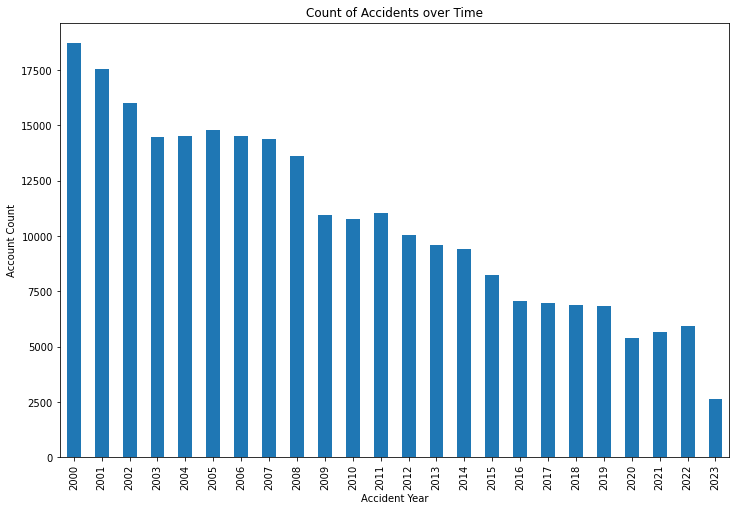

In [92]:
# convert column to datetime
accidents['Date'] = pd.to_datetime(accidents['ACCIDENT_DT'])

# create a representation of the month with strfmt
accidents['ymaccident'] = accidents['Date'].map(lambda dt: dt.strftime('%Y-%m'))

grouped_df = accidents.groupby('CAL_YR').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='CAL_YR', y='count', legend = None, figsize=(12,8))
plt.xlabel('Accident Year')
plt.ylabel('Account Count')
plt.title('Count of Accidents over Time')


### Numeric EDA

#### Overall Visualization

array([[<AxesSubplot: title={'center': 'MINE_ID'}>,
        <AxesSubplot: title={'center': 'DOCUMENT_NO'}>,
        <AxesSubplot: title={'center': 'SUBUNIT_CD'}>,
        <AxesSubplot: title={'center': 'CAL_YR'}>],
       [<AxesSubplot: title={'center': 'CAL_QTR'}>,
        <AxesSubplot: title={'center': 'FISCAL_YR'}>,
        <AxesSubplot: title={'center': 'FISCAL_QTR'}>,
        <AxesSubplot: title={'center': 'ACCIDENT_TIME'}>],
       [<AxesSubplot: title={'center': 'FIPS_STATE_CD'}>,
        <AxesSubplot: title={'center': 'SHIFT_BEGIN_TIME'}>,
        <AxesSubplot: title={'center': 'NO_INJURIES'}>,
        <AxesSubplot: title={'center': 'TOT_EXPER'}>],
       [<AxesSubplot: title={'center': 'MINE_EXPER'}>,
        <AxesSubplot: title={'center': 'SCHEDULE_CHARGE'}>,
        <AxesSubplot: title={'center': 'DAYS_RESTRICT'}>,
        <AxesSubplot: title={'center': 'Date'}>]], dtype=object)

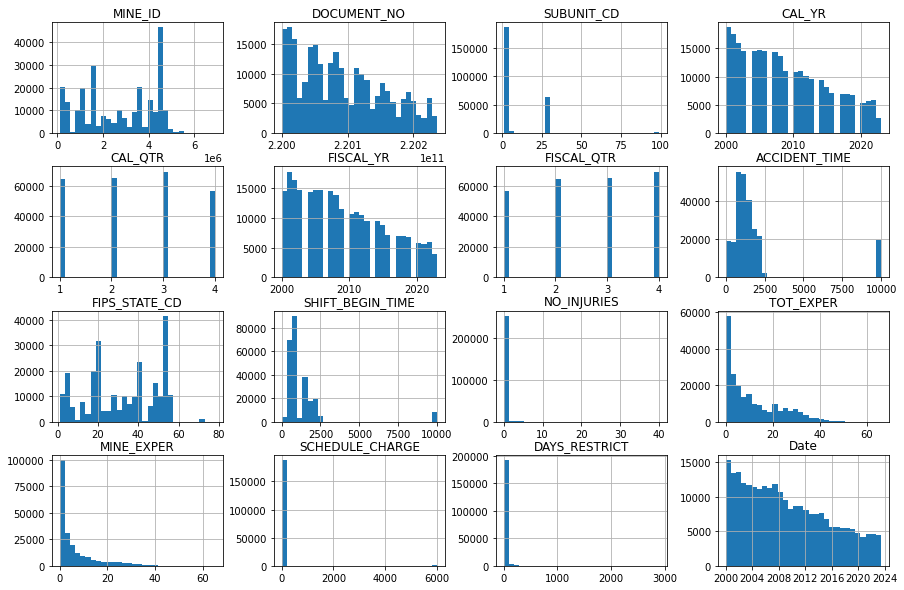

In [93]:
accidents.hist(bins=30, figsize=(15, 10))

##### No_Injuries

Number of reportable injuries or illnesses resulting from the accident.  Zero is a valid number if no employees were injured in the accident or if the injury was not reportable.


In [103]:
accidents.NO_INJURIES.describe()

count    255907.000000
mean          0.911486
std           0.650838
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          40.000000
Name: NO_INJURIES, dtype: float64

##### Tot_Exper

Total mining experience of the person affected calculated in decimal years.  The calculation uses both the years and months experience.  May contain null values. 

35. MINE_EXPER|NUMBER|4,2|Total experience at a specific mine of the person affected calculated in decimal years.  The calculation uses both the years and months experience at the mine.  May contain null values.
36. JOB_EXPER|NUMBER|4,2|Experience in the job title of the person affected calculated in decimal year.  The calculation uses both the years and months experience.  May contain null values.


In [105]:
accidents.TOT_EXPER.describe()

count    213329.000000
mean         11.118633
std          10.950627
min           0.010000
25%           2.000000
50%           7.000000
75%          18.580000
max          66.000000
Name: TOT_EXPER, dtype: float64

##### Mine_Exper

Total experience at a specific mine of the person affected calculated in decimal years.  The calculation uses both the years and months experience at the mine.  May contain null values.


In [106]:
accidents.MINE_EXPER.describe()

count    216258.000000
mean          6.541352
std           8.698306
min           0.010000
25%           0.690000
50%           2.850000
75%           8.630000
max          65.000000
Name: MINE_EXPER, dtype: float64

##### Days_Restrict

Number of days of restricted work activity due to the injury/illness.  May contain null values if situation does not apply.



In [108]:
accidents.DAYS_RESTRICT.describe()

count    196003.000000
mean          8.830013
std          29.455924
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        2896.000000
Name: DAYS_RESTRICT, dtype: float64

#### Pairwise Plots

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

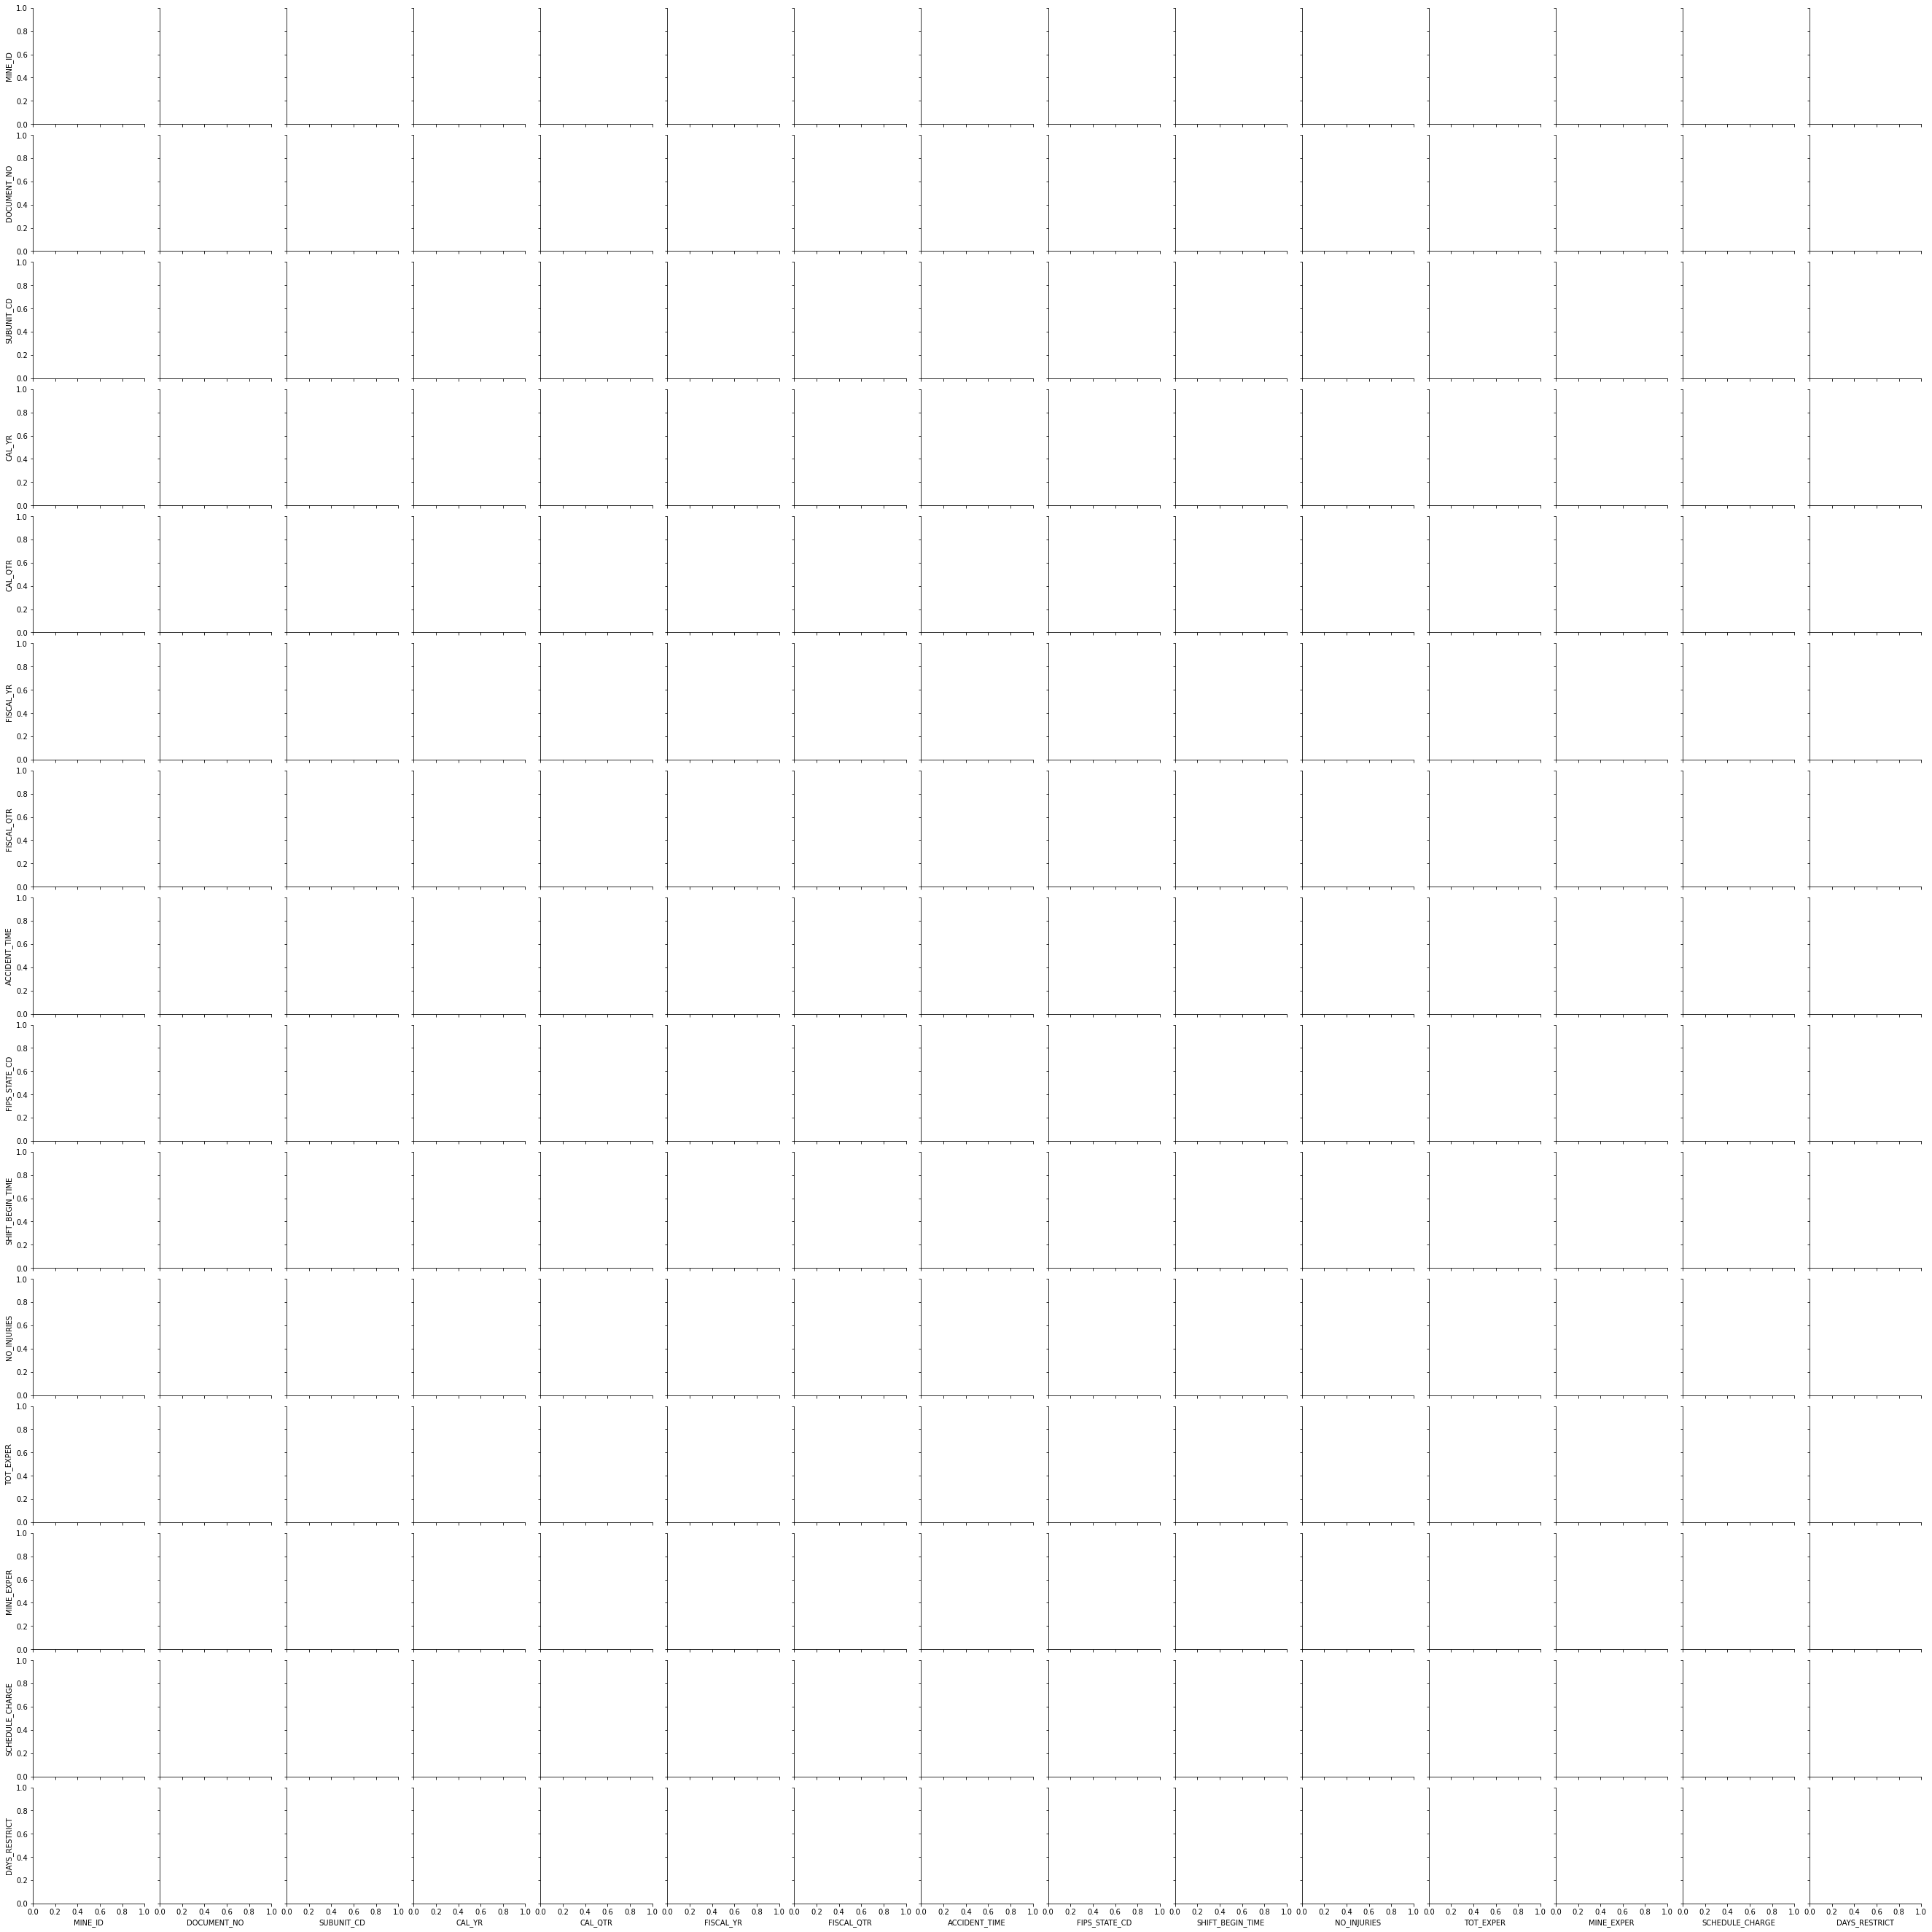

In [110]:
#numeric_vars = accidents[['MINE_ID', 'DOCUMENT_NO', 'SUBUNIT_CD', 'CAL_YR', 'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 
                           'ACCIDENT_TIME', 'FIPS_STATE_CD', 'SHIFT_BEGIN_TIME', 'NO_INJURIES', 'TOT_EXPER',
                          'MINE_EXPER', 'SCHEDULE_CHARGE', 'DAYS_RESTRICT']]
#sns.pairplot(numeric_vars)
#plt.show()

#### Correlation

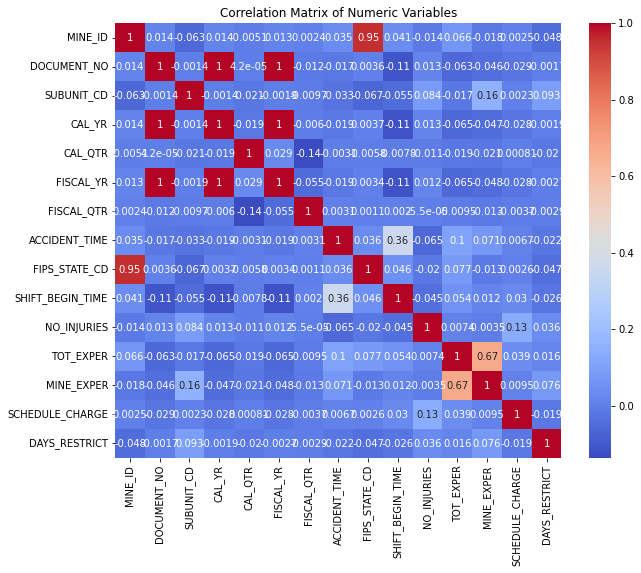

In [111]:
corr_matrix = numeric_vars.corr()

# Set the figure size to prevent overlapping
plt.figure(figsize=(10, 8))

# Create and show heatmap - add fontsize parameter
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 10})
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

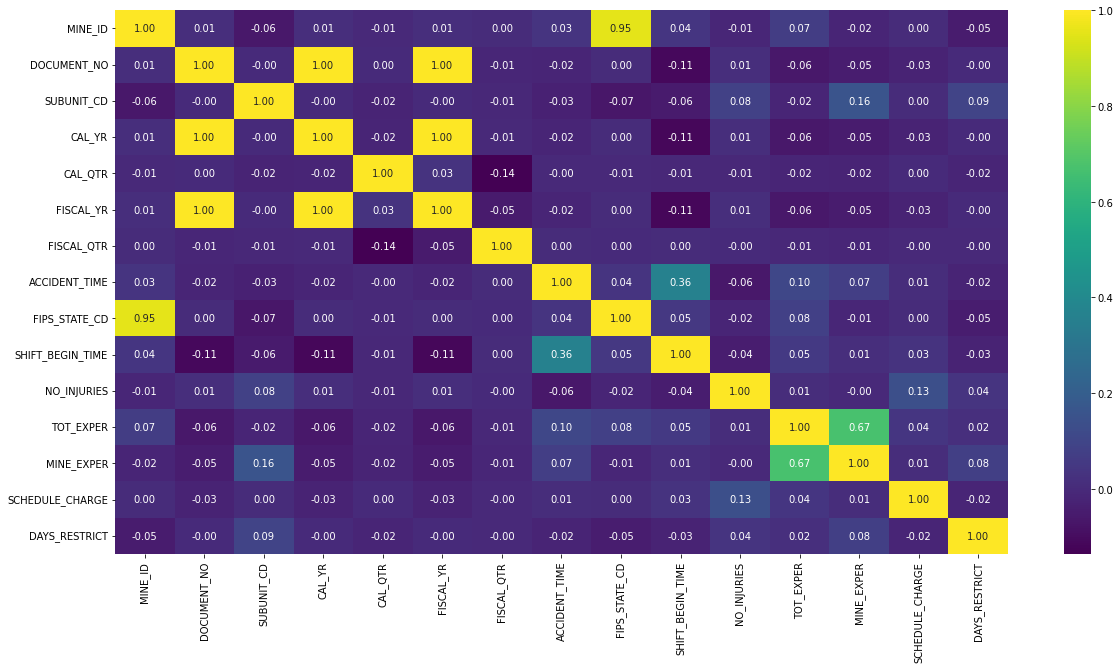

In [112]:
plt.subplots(figsize=(20,10))
sns.heatmap(numeric_vars.corr(), annot = True, fmt = ".2f", cmap = "viridis");

### Categorical EDA

In [96]:
accidents.DEGREE_INJURY.value_counts(normalize = True)

DEGREE_INJURY
DAYS AWAY FROM WORK ONLY          0.323876
NO DYS AWY FRM WRK,NO RSTR ACT    0.261590
DAYS RESTRICTED ACTIVITY ONLY     0.156550
ACCIDENT ONLY                     0.113101
DYS AWY FRM WRK & RESTRCTD ACT    0.074333
OCCUPATNAL ILLNESS NOT DEG 1-6    0.038463
PERM TOT OR PERM PRTL DISABLTY    0.008995
ALL OTHER CASES (INCL 1ST AID)    0.007752
INJURIES DUE TO NATURAL CAUSES    0.005361
FATALITY                          0.004341
NO VALUE FOUND                    0.003556
INJURIES INVOLVNG NONEMPLOYEES    0.002083
Name: proportion, dtype: float64

In [97]:
accidents.CLASSIFICATION.value_counts(normalize = True)

CLASSIFICATION
HANDLING OF MATERIALS                    0.286608
SLIP OR FALL OF PERSON                   0.170034
HANDTOOLS (NONPOWERED)                   0.105192
FALL OF ROOF OR BACK                     0.102946
MACHINERY                                0.101305
POWERED HAULAGE                          0.072852
OTHER                                    0.027922
DISORDERS (REPEATED TRAUMA)              0.022240
HOISTING                                 0.019404
STEPPING OR KNEELING ON OBJECT           0.013750
STRIKING OR BUMPING                      0.009065
FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL    0.008846
DUST DISEASE OF LUNGS                    0.008315
NO VALUE FOUND                           0.008229
FIRE                                     0.008033
ELECTRICAL                               0.005970
IGNITION OR EXPLOSION OF GAS OR DUST     0.005392
EXPLODING VESSELS UNDER PRESSURE         0.003896
FALLING/SLIDING/ROLLING MATERIALS        0.003509
DISORDERS (PHYSICAL AGENTS)        

In [98]:
accidents.ACCIDENT_TYPE.value_counts(normalize = True)

ACCIDENT_TYPE
Over-exertion NEC                                                   0.121376
Struck by... NEC                                                    0.117766
Accident type, without injuries                                     0.113019
Struck by falling object                                            0.087203
Over-exertion in lifting objects                                    0.066303
Caught in, under or between a moving and a stationary object        0.062419
Struck against stationary object                                    0.056191
Fall to the walkway or working surface                              0.045903
Struck against a moving object                                      0.043094
Struck by flying object                                             0.038706
Caught in, under or between NEC                                     0.032247
Fall onto or against objects                                        0.029340
Fall from machine                                             